In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from aging.behavior.syllables import relabel_by_usage
from aging.organization.ontogeny import age_map_male
from aging.plotting import (
    format_plots,
    PlotConfig,
    save_factory,
    figure,
    legend,
    ONTOGENY_AGE_CMAP,
)

In [3]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "size-across-age", tight_layout=False)

In [4]:
version = 5
df = pd.read_parquet(f'/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/ontogeny_males_syllable_df_v00.parquet')
df, usage_map = relabel_by_usage(df)
df['age'] = df['age'].map(age_map_male).astype('int')

In [5]:
target_height = 670

In [6]:
df.head()

,experiment,file,syllables,date,uuid,age,true_depth,session_name,subject_name,timestamps,...,recon_width,recon_length,recon_height,recon_area,rescaled_width,rescaled_length,rescaled_height,rescaled_area,onsets,relabeled_syllables
0,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,59,2021-11-18 12:56:55,7e1cf5dd-0431-4f64-b281-fb2e4e6c4869,9,656.0,ontogeny_cohorts_9wks,m16_b04_c01,0.000000,...,21.909496,32.265102,37.958023,594.0,21.181297,27.371504,38.561069,524.0,False,30
1,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,59,2021-11-18 12:56:55,7e1cf5dd-0431-4f64-b281-fb2e4e6c4869,9,656.0,ontogeny_cohorts_9wks,m16_b04_c01,0.033333,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
2,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,59,2021-11-18 12:56:55,7e1cf5dd-0431-4f64-b281-fb2e4e6c4869,9,656.0,ontogeny_cohorts_9wks,m16_b04_c01,0.066667,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
3,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,59,2021-11-18 12:56:55,7e1cf5dd-0431-4f64-b281-fb2e4e6c4869,9,656.0,ontogeny_cohorts_9wks,m16_b04_c01,0.100000,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30
4,ontogeny_males,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,59,2021-11-18 12:56:55,7e1cf5dd-0431-4f64-b281-fb2e4e6c4869,9,656.0,ontogeny_cohorts_9wks,m16_b04_c01,0.133333,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,30


In [7]:
scalars = (
    df.groupby(["age", "session_name", "uuid"], sort=False)
    .median(numeric_only=True)
    .reset_index()
)
scalars = scalars[scalars["velocity_2d_mm"] < 5]
scalars["velocity_3d_mm"] *= 30

In [8]:
scalars = scalars[~scalars['session_name'].str.contains("CRL")]

In [9]:
scalar_keys = [
    "rescaled_area",
    "rescaled_width",
    "height_ave_mm",
    "rescaled_length",
    "velocity_2d_mm",
    "recon_area",
    "recon_width",
    "recon_length",
    "recon_height",
]

In [10]:
variances = scalars.groupby('age').std(numeric_only=True)

In [11]:
means = scalars.groupby('age').mean(numeric_only=True)

In [12]:
variances

,syllables,true_depth,timestamps,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,height_ave_mm,...,recon_width,recon_length,recon_height,recon_area,rescaled_width,rescaled_length,rescaled_height,rescaled_area,onsets,relabeled_syllables
age,,,,,,,,,,,,,,,,,,,,,
3,7.018725,12.286680,0.353883,37.510840,24.727094,34.842630,21.680857,32.966094,19.547977,1.057098,...,0.198740,0.810611,1.130565,6.374101,0.519237,1.490261,0.981506,23.435639,0.0,2.713393
5,3.872445,12.111284,0.118129,63.058843,44.641489,26.633627,17.450846,39.585049,23.939739,1.500935,...,0.227083,0.550570,1.244740,5.966224,0.857729,1.204396,1.335365,32.670004,0.0,1.896268
7,5.505841,11.598132,0.160507,68.233534,50.388302,29.576590,18.090277,24.412341,15.195818,1.610690,...,0.240514,1.052869,0.783949,12.962584,0.683977,1.528940,1.447151,34.083511,0.0,1.552264
9,4.968030,10.778744,0.093905,58.079035,36.709806,25.174143,16.284072,25.724663,15.520385,1.467727,...,0.352515,0.994841,1.354102,9.631679,0.606210,1.887997,1.462777,34.207512,0.0,2.745626
12,5.521520,10.396214,0.650937,75.735574,50.996508,27.824369,17.440931,23.235346,13.827987,1.090714,...,0.339455,1.135751,0.795701,11.732537,0.904387,2.305948,1.040682,42.543492,0.0,2.457038
24,4.529893,7.932688,0.253309,51.805318,34.667964,28.418661,18.615035,31.149591,18.908504,1.037804,...,0.327056,1.334389,0.621021,12.003321,0.756455,2.173488,1.053908,22.701593,0.0,3.887690
36,5.600223,2.125245,0.092419,49.577322,29.876342,25.267282,15.658598,37.525201,22.453341,1.404882,...,0.358267,1.304097,0.549069,9.966611,0.924716,1.513265,1.348424,32.283058,0.0,3.614208
52,5.856226,9.697660,0.166956,88.358379,60.792877,24.110074,15.093239,22.258991,13.204396,1.249967,...,0.305699,1.325355,0.407826,11.838139,1.091739,2.046445,1.302603,47.476051,0.0,3.466987
78,5.344540,10.450262,0.191659,153.174692,96.877680,19.683958,11.753513,20.747340,12.329384,1.265465,...,0.403511,1.500958,0.451393,14.265592,1.962974,2.023483,1.221872,85.187576,0.0,3.495214


In [22]:
ex = variances[['rescaled_area', 'recon_area']].reset_index().melt(id_vars='age')

/tmp/ipykernel_3090/219446914.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])


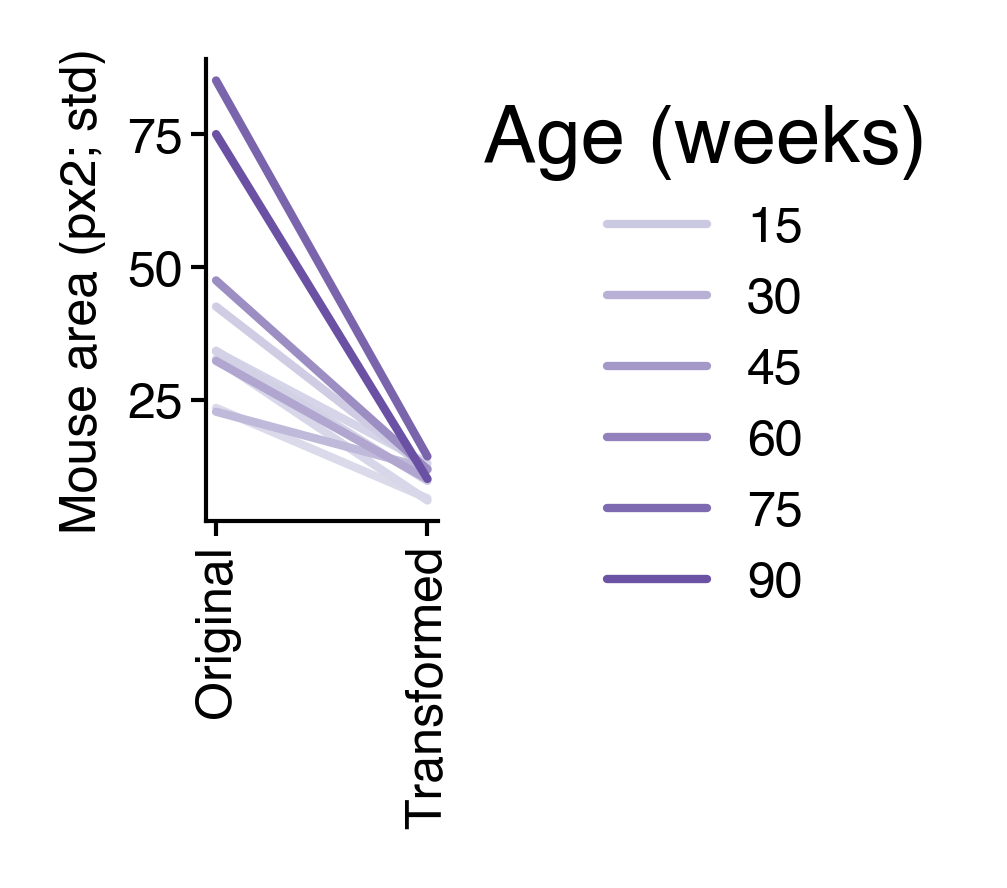

In [23]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; std)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-variability");

In [24]:
ex = means[['rescaled_area', 'recon_area']].reset_index().melt(id_vars='age')

/tmp/ipykernel_3090/1922211295.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])


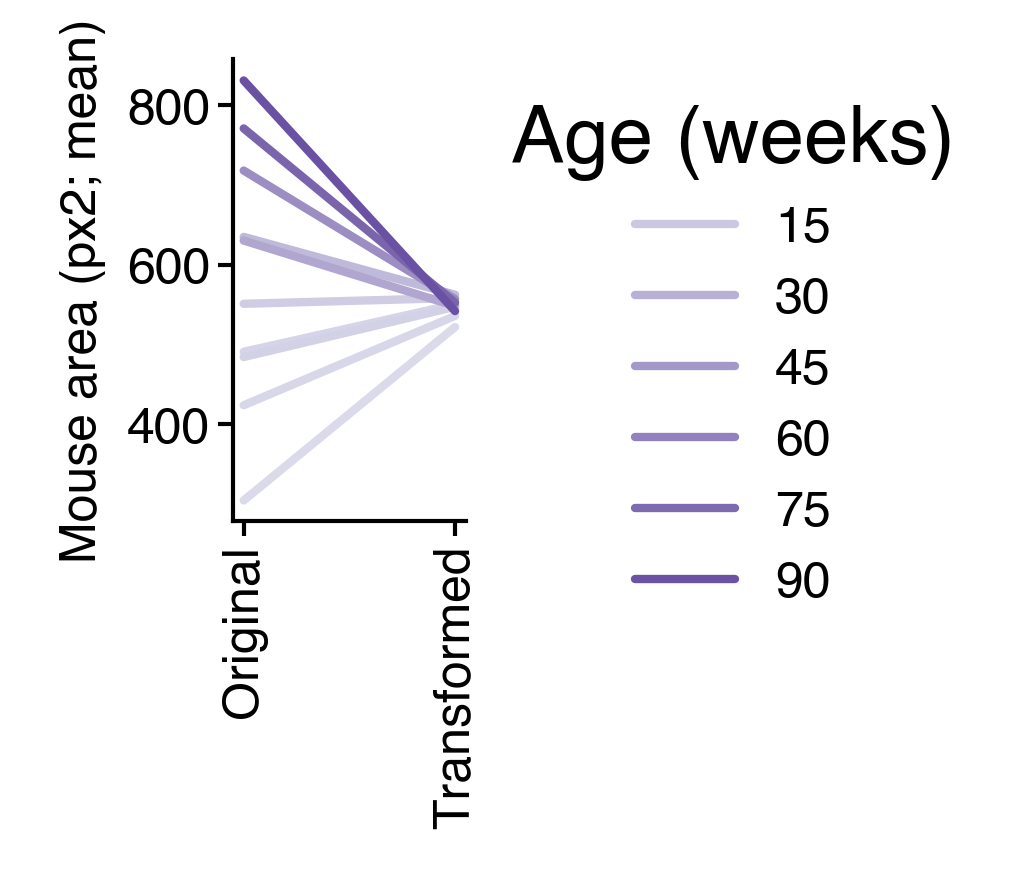

In [25]:
fig = figure(0.5, 1)
ax = sns.lineplot(
    data=ex, x="variable", y="value", hue="age", palette=ONTOGENY_AGE_CMAP
)
ax.set(ylabel="Mouse area (px2; mean)", xlabel="", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "intra-age-area-mean");

In [34]:
avg_scalars = scalars.groupby('age').mean(numeric_only=True)

In [43]:
boots = []
for i in tqdm(range(1_000)):
    boots.append(avg_scalars.sample(frac=1, replace=True).std()[['rescaled_area', 'recon_area']])
boots = pd.concat(boots).reset_index().rename(columns={0: 'std'})

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
boots

,index,std
0,rescaled_area,89.492210
1,recon_area,5.996367
2,rescaled_area,159.413562
3,recon_area,12.675641
4,rescaled_area,157.596000
...,...,...
1995,recon_area,13.809667
1996,rescaled_area,138.256469
1997,recon_area,6.563003
1998,rescaled_area,142.337797


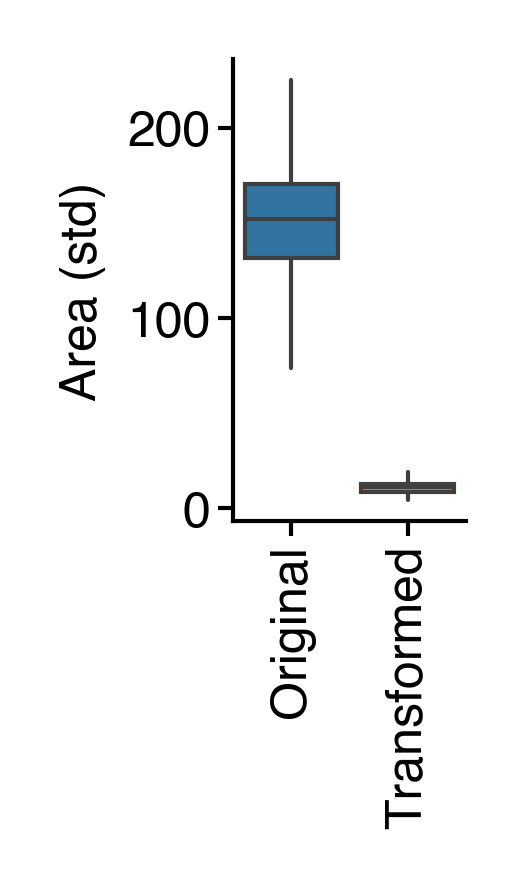

In [51]:
fig = figure(0.5, 1)
ax = sns.boxplot(
    data=boots, x="index", y="std", showcaps=False, showfliers=False, linewidth=0.5
)
ax.set(xlabel="", ylabel="Area (std)", xticklabels=["Original", "Transformed"])
plt.xticks(rotation=90)
sns.despine()
saver(fig, "inter-age-area-variability");

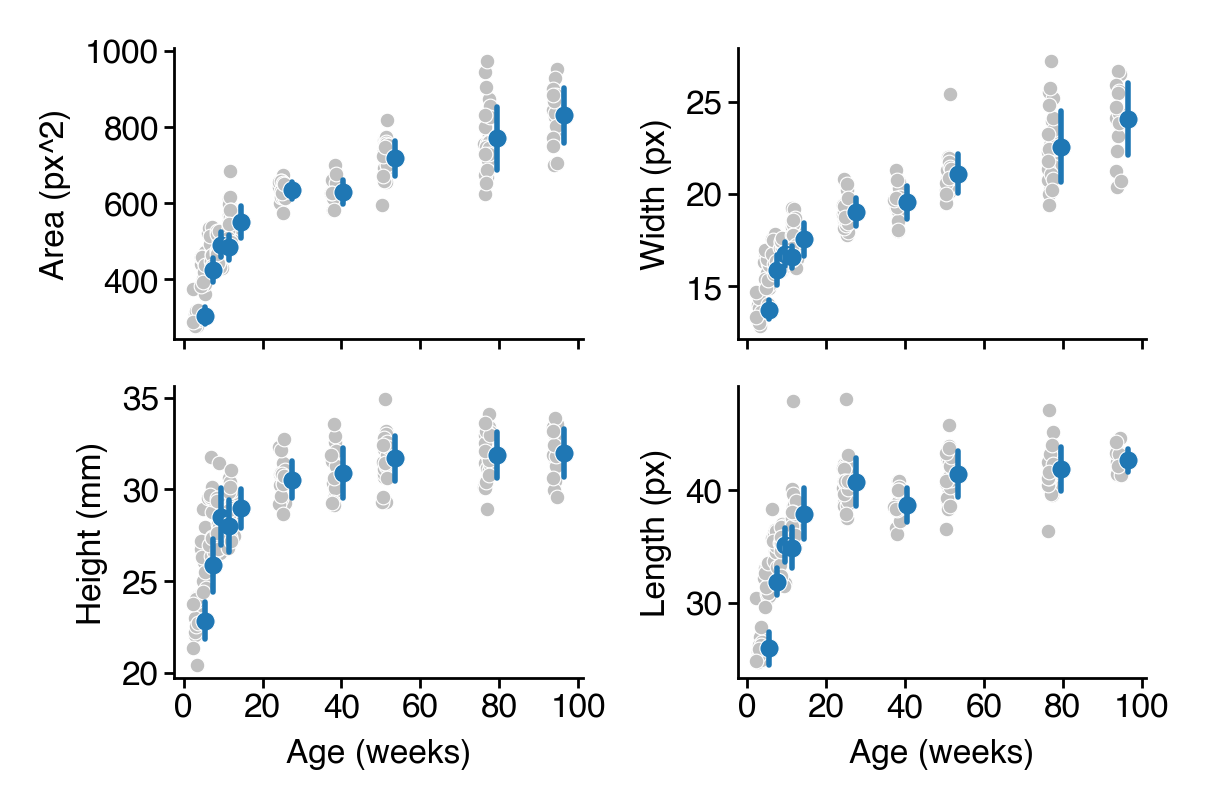

In [117]:
np.random.seed(0)
fig, ax = plt.subplots(2, 2, figsize=(3, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    a = sns.scatterplot(
        data=tmp,
        x="age",
        y=key,
        color="silver",
        ax=a,
        s=7,
    )
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, 'scalars-vs-age', tight_layout=True);

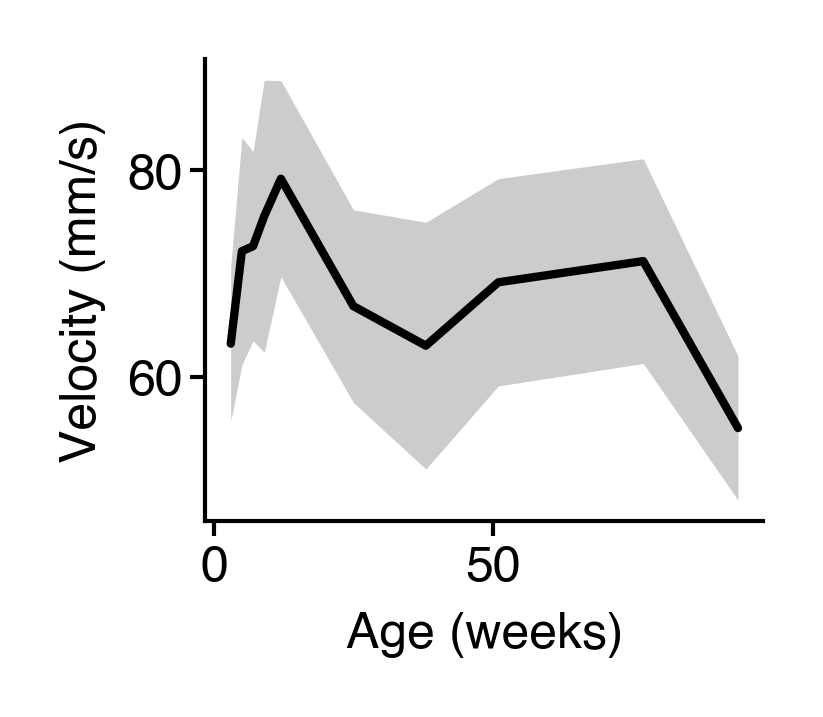

In [46]:
fig = figure(1.2, 1)
ax = sns.lineplot(data=scalars, x='age', y='velocity_3d_mm', err_kws=dict(lw=0), errorbar='sd', color='k')
ax.set(ylabel='Velocity (mm/s)', xlabel='Age (weeks)')
sns.despine()
# saver(fig, 'velocity-vs-age');

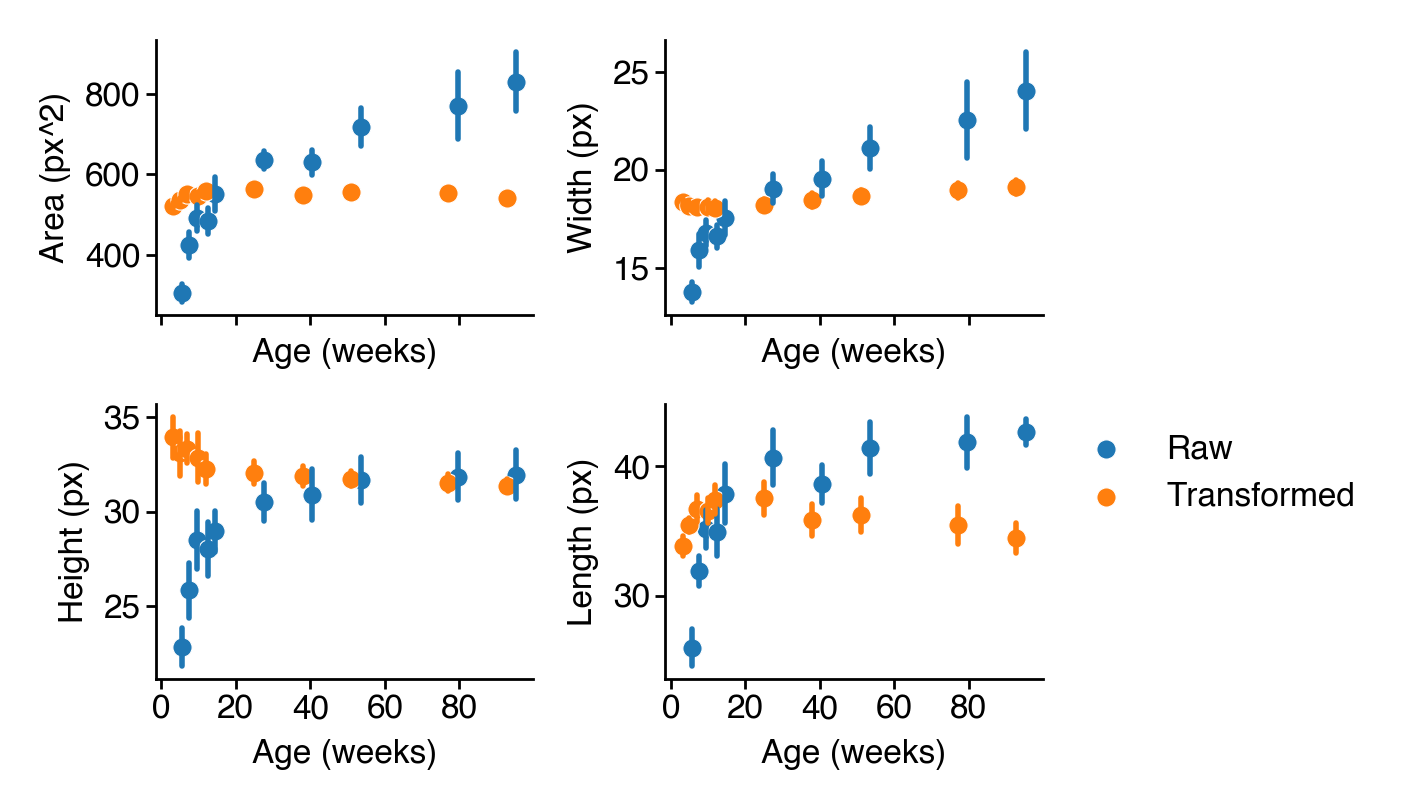

In [118]:
np.random.seed(0)
include_scatter = False
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
# tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if 'height' in key else key.split('_')[1]
    if include_scatter:
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=key,
            color="silver",
            ax=a,
            s=7,
        )
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=f'recon_{scalar_key}',
            color="silver",
            ax=a,
            s=7,
        )
        a.legend_.remove()
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Raw",
    )
    sns.regplot(
        data=tmp,
        x="age",
        y=f'recon_{scalar_key}',
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Transformed",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
legend(a)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, "scalars-vs-age-with-recon", tight_layout=True);

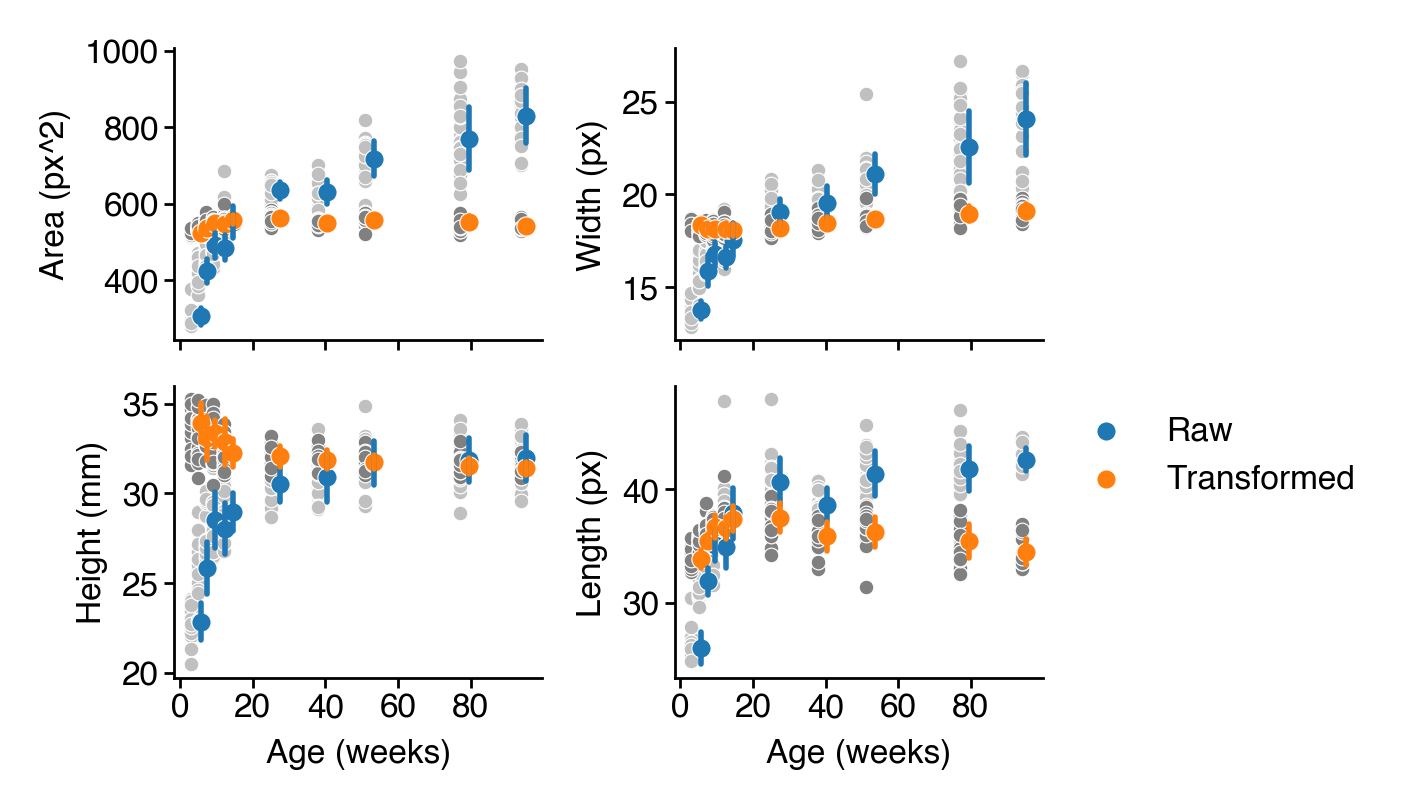

In [119]:
np.random.seed(0)
include_scatter = True
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2), sharex=True)

tmp = scalars.sort_values(by="age")
tmp2 = tmp.copy()
tmp2["age"] += 2.5
# tmp['age'] += np.random.uniform(-0.75, 0.75, size=len(tmp))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if 'height' in key else key.split('_')[1]
    if include_scatter:
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=key,
            color="silver",
            ax=a,
            s=7,
        )
        a = sns.scatterplot(
            data=tmp,
            x="age",
            y=f'recon_{scalar_key}',
            color="gray",
            ax=a,
            s=7,
        )
    sns.regplot(
        data=tmp2,
        x="age",
        y=key,
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Original",
    )
    sns.regplot(
        data=tmp2,
        x="age",
        y=f'recon_{scalar_key}',
        ax=a,
        fit_reg=False,
        x_bins=tmp["age"].nunique() + 2,
        scatter_kws=dict(s=12, ec="w", lw=0.2),
        x_ci="sd",
        label="Transformed",
    )
    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    if "height" in key:
        a.set(ylabel=key.split("_")[0].capitalize() + unit, xlabel="Age (weeks)")
    else:
        a.set(ylabel=key.split("_")[1].capitalize() + unit, xlabel="Age (weeks)")
    for line in a.get_lines():
        line.set_linewidth(1)
legend(a)
plt.locator_params(axis="x", nbins=6)
sns.despine()
saver(fig, "scalars-vs-age-with-recon", tight_layout=True);

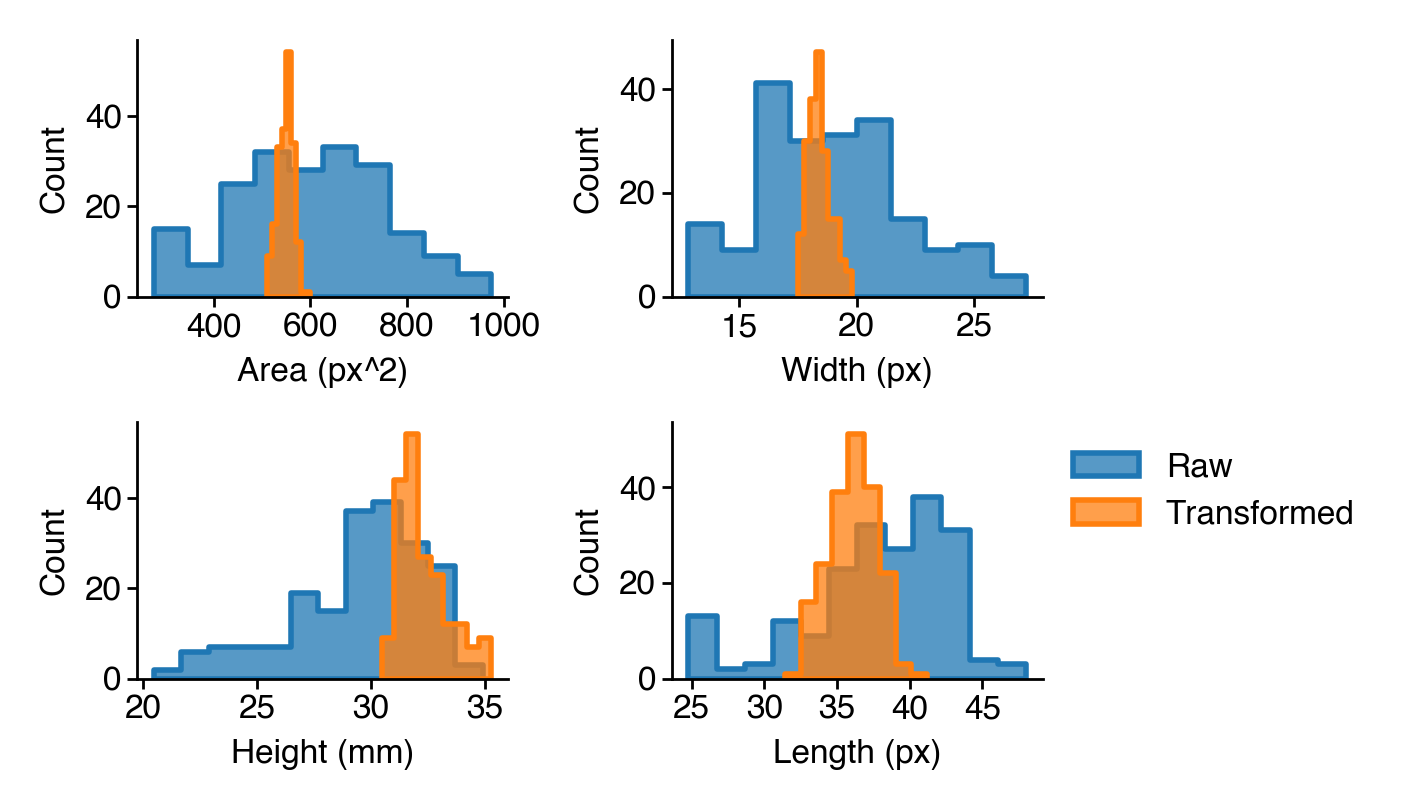

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(3.5, 2))

for key, a in zip(scalar_keys, ax.flat):
    scalar_key = key.split("_")[0] if "height" in key else key.split("_")[1]
    a = sns.histplot(
        scalars[key], ax=a, color="C0", label="Original", element="step", lw=1
    )
    a = sns.histplot(
        scalars[f"recon_{scalar_key}"],
        ax=a,
        color="C1",
        label="Transformed",
        element="step",
        lw=1,
        bins=9,
    )

    unit = " (px^2)" if "area" in key else " (px)"
    unit = unit if "height" not in key else " (mm)"
    a.set(xlabel=scalar_key.capitalize() + unit)
    a.locator_params(axis="x", nbins=6)
legend(a)
sns.despine()
saver(fig, "scalar-histplots", tight_layout=True);